# **Introduction to Computer Vision - Fall 2021**

# Midterm Exam ( Practical Test )

# 13.09.2021

## submit before 12:40

**Submit a copy of this file including your solution with results in a ipynb file (your_name.ipynb)**



### **Task 1 (40%)** 

Detect the object shown in Fig. 1 within the scene in Fig. 2. using SIFT

Display the good matching key points

Crop the detected object out of the source image

Results for each step should be printed, comments on the codes are required



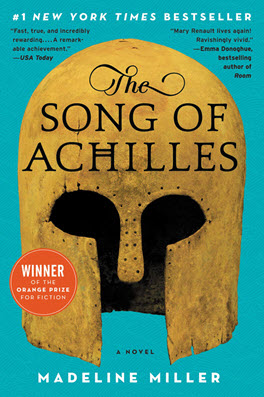

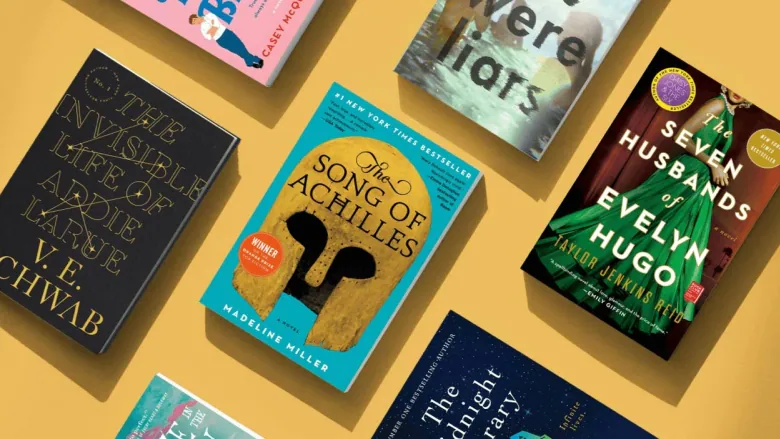

In [14]:
!pip install opencv-python==3.4.2.17
!pip install opencv-contrib-python==3.4.2.17

     |████████████████████████████████| 25.0 MB 99 kB/s 
  Attempting uninstall: opencv-python
    Found existing installation: opencv-python 4.1.2.30
    Uninstalling opencv-python-4.1.2.30:
      Successfully uninstalled opencv-python-4.1.2.30
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
albumentations 0.1.12 requires imgaug<0.2.7,>=0.2.5, but you have imgaug 0.2.9 which is incompatible.


     |████████████████████████████████| 30.6 MB 26 kB/s 
  Attempting uninstall: opencv-contrib-python
    Found existing installation: opencv-contrib-python 4.1.2.30
    Uninstalling opencv-contrib-python-4.1.2.30:
      Successfully uninstalled opencv-contrib-python-4.1.2.30


In [ ]:
# Download the image
!wget https://www.dropbox.com/s/b3o5yomqvzteipe/Copy%20of%20Copy%20of%2081msb6gUBTL.jpg?dl=0 -O book.jpg
!wget https://www.dropbox.com/s/2uqbajma9nnb490/indigo-booktok.webp?dl=0 -O scene.jpg

In [2]:
import numpy as np
import cv2
from matplotlib import pyplot as plt

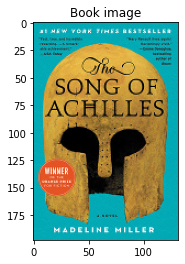

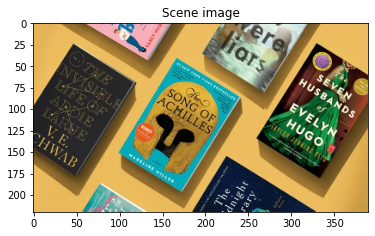

In [3]:
# Load and display images (5%)
book_img = cv2.imread("book.jpg", cv2.IMREAD_COLOR)
scene_img = cv2.imread("scene.jpg", cv2.IMREAD_COLOR)
# convert to rgb
book_img = cv2.cvtColor(book_img, cv2.COLOR_BGR2RGB)
scene_img = cv2.cvtColor(scene_img, cv2.COLOR_BGR2RGB)
# resize images
book_img = cv2.resize(book_img, None, fx=0.5, fy=0.5, interpolation = cv2.INTER_CUBIC)
scene_img = cv2.resize(scene_img, None, fx=0.5, fy=0.5, interpolation = cv2.INTER_CUBIC)
# show images
plt.imshow(book_img)
plt.title("Book image")
plt.show()
plt.imshow(scene_img)
plt.title("Scene image")
plt.show()

In [6]:
# write yor code for object detection (10%)
sift = cv2.xfeatures2d.SIFT_create()
# find the keypoints and descriptors for book and scene image
kp1, des1 = sift.detectAndCompute(book_img, None)
kp2, des2 = sift.detectAndCompute(scene_img, None)

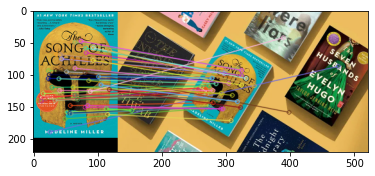

In [13]:
# display good matching (10%)
# BFMatcher with default params
bf = cv2.BFMatcher()
# find matches in book and scene
matches = bf.knnMatch(des1, des2, k=2)

# leave only good matches
good = []
for m, n in matches:
    if m.distance < 0.8 * n.distance:
        good.append([m])

# draw good matches using cv2.drawMatchesKnn
result = cv2.drawMatchesKnn(book_img, kp1, scene_img, kp2, good, None, flags=2)
# show result
plt.imshow(result)
plt.show()

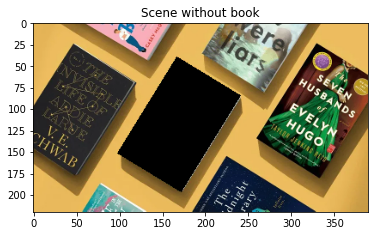

In [22]:
# crop out (remove) the detected object from the scene (15%)
src_pts = np.float32([ kp1[m[0].queryIdx].pt for m in good ]).reshape(-1,1,2)
dst_pts = np.float32([ kp2[m[0].trainIdx].pt for m in good ]).reshape(-1,1,2)
M, mask = cv2.findHomography(src_pts, dst_pts, cv2.RANSAC,5.0)
# Take corners of the first image and transform them onto the second image
h, w, c = book_img.shape
pts = np.float32([[0, 0], [0, h - 1], [w - 1, h - 1], [w - 1, 0]]).reshape(-1,1,2)
dst = cv2.perspectiveTransform(pts, M)
# fill everything inside detected colors by black
res_scene = scene_img.copy()
cv2.fillPoly(res_scene, [np.int32(dst)], (0,0,0))
# show image
plt.imshow(res_scene)
plt.title("Scene without book")
plt.show()

### **Task 2 (60%)**

The aim of this task is to extract the plate of the key shown in Fig.3 that has the number, the final result should be similar to Fig. 4.

DO NOT use template matching or any detection method.

**Results for each step should be printed, comments on the codes are required**


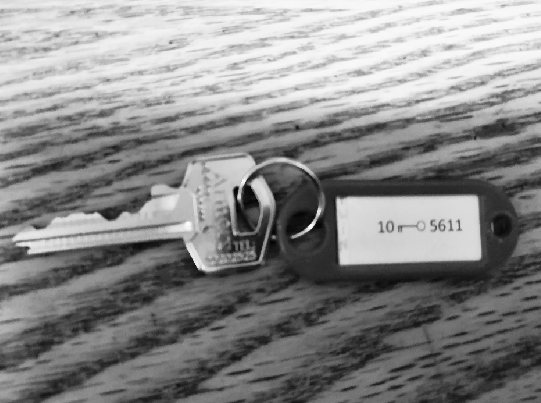


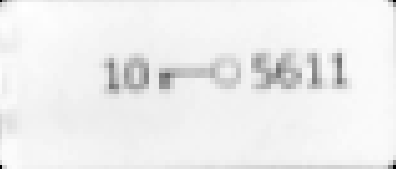







In [ ]:
# Download the image
!wget https://www.dropbox.com/s/evoml3c3xlh7633/key.jpg?dl=0 -O keys.jpg

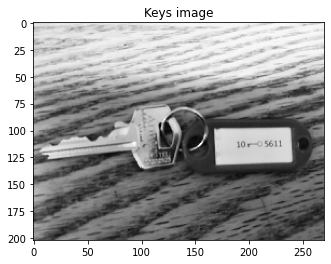

In [24]:
# Load and display the image (5%)
keys_img = cv2.imread("keys.jpg", cv2.IMREAD_COLOR)
# convert to rgb
keys_img = cv2.cvtColor(keys_img, cv2.COLOR_BGR2RGB)
# resize image
keys_img = cv2.resize(keys_img, None, fx=0.5, fy=0.5, interpolation = cv2.INTER_CUBIC)
# show image
plt.imshow(keys_img)
plt.title("Keys image")
plt.show()

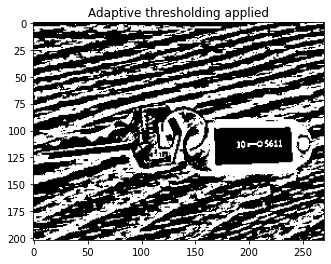

In [68]:
# Apply adaptive thresholding, using slider, and adjust the threshold value to get the best output (15%)
# convert from rgb to gray scale and show
keys_gray = cv2.cvtColor(keys_img, cv2.COLOR_RGB2GRAY)
# plt.imshow(keys_gray, cmap='gray')
# plt.title("Gray keys")
# plt.show()

# apply adaptive thresholding
#@title Parameters { run: "auto" }
block_size = 25 #@param {type:"slider", min:1, max:155, step:2}
c_value = 4 #@param {type:"slider", min:-20, max:20, step:1}
adaptive = cv2.adaptiveThreshold(keys_gray, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY_INV, block_size, c_value)
plt.imshow(adaptive, cmap='gray')
plt.title("Adaptive thresholding applied")
plt.show()


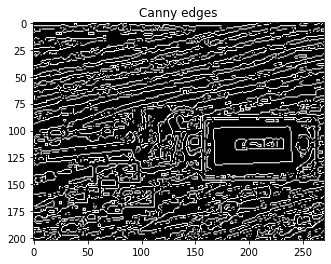

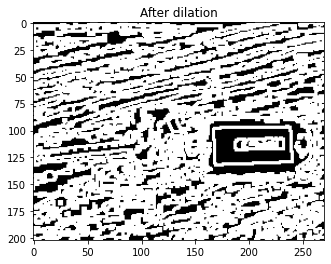

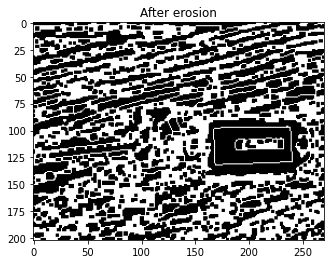

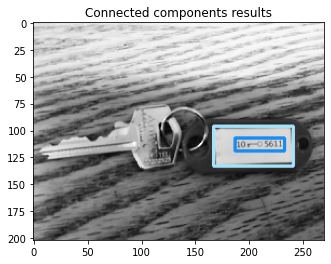

In [96]:
import random
# For the binary image resulted from the thresholding, obtain the contours of the objects. 
# Then, among all contours, consider only the one of the plate. (20%)
# HHint: use CHAIN_APPROX_SIMPLE to extract minimum points that represent the contour.
# Detect edges using Canny
canny = cv2.Canny(adaptive, 100, 200)
plt.imshow(canny, cmap='gray')
plt.title("Canny edges")
plt.show()
# erosion and dilation applied
kernel = np.ones((3, 3), np.uint8)
dilation = cv2.dilate(canny, kernel, iterations = 1)
plt.imshow(dilation, cmap='gray')
plt.title("After dilation")
plt.show()
erosion = cv2.erode(dilation, kernel, iterations = 1)
plt.imshow(erosion, cmap='gray')
plt.title("After erosion")
plt.show()

# Apply connected components
res = cv2.connectedComponentsWithStats(erosion, 4, cv2.CV_32S)
n, labels_im, stats, centroids = res[0], res[1], res[2], res[3]
result = keys_img.copy()
min_x, min_y, min_w, min_h, min_area = 0, 0, 0, 0, 500
for i in range(n):
  x = stats[i, cv2.CC_STAT_LEFT]
  y = stats[i, cv2.CC_STAT_TOP]
  width = stats[i, cv2.CC_STAT_WIDTH] # horizontal
  height = stats[i, cv2.CC_STAT_HEIGHT] # vertical
  area = stats[i, cv2.CC_STAT_AREA]
  if area > 300 or area < 100:
    continue
  # find smalles area that meets criteria above
  if min_area > area:
    min_area=area
    min_x = x
    min_y = y
    min_w = width
    min_h = height
  # draw rectangle 
  color = (random.randint(0,256), random.randint(0,256), random.randint(0,256))
  cv2.rectangle(result, (x, y), (x + width, y + height), color, 2)
# show image 
plt.imshow(result)
plt.title("Connected components results")
plt.show()


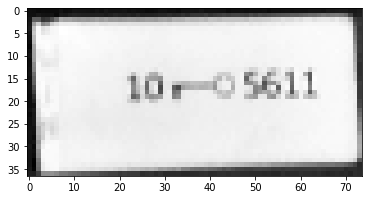

In [95]:
# crop the region of the image that includes the numbers.
# and Do all necessary transformations to get closest imsge to the one in Fig. 4 (20%)
crop_img = keys_gray[min_y:min_y+min_h, min_x:min_x+min_w]
plt.imshow(crop_img, cmap='gray')
plt.show()